<b>Audio and Music Processing Lab - Module 2</b><br>Rafael Caro Repetto<br>rafael.caro@upf.edu<br>09.02.2022
## AMPLab2 - Introduction to music21 (3)
### Exercise 3
Q. **Are there melodic changes between the three renditions in the performance of an Arab-Andalusian *mīzān*, namely *muassa‘*, *mahzūz* and *inṣirāf*?**

M. *Plot a bar chart with the number of intervals in each of these three sections, taken from the four scores segmented in the annotations json file.*

In [1]:
from music21 import *
import json
import os
import numpy as np
import matplotlib.pyplot as plt

jsonFile = 'arab-andalusian-scores-lines.json'# Path to the annotations json file
datasetPath = 'ArabAndalusianScores/'# Path to the folder that contains the MusicXML scores

First of all, let's load the annotations in the json file.

In [2]:
with open(jsonFile, 'r', encoding='utf-8') as f:
    annotations = json.load(f)

In [3]:
annotations

[{'mbid': '7448d9c2-5261-4e70-bd98-6ed8416f908f',
  'nawba': 'al-māya',
  'sections': [{'name': 'mišālia',
    'ṭab‘': 'al-māya',
    'mīzān': 'none',
    'start': 2.5,
    'end': 256.0},
   {'name': 'tawāšī',
    'ṭab‘': 'al-māya',
    'mīzān': 'binary',
    'start': 260.0,
    'end': 536.0},
   {'name': 'muassa‘',
    'ṭab‘': 'al-māya',
    'mīzān': 'basīṭ',
    'start': 538.0,
    'ṣanā`i`': [{'name': 'muassa‘.1',
      'form': 'moaxaja',
      'start': 543.5,
      'lines': [{'name': 'muassa‘.1.1',
        'start': 543.5,
        'sections': [{'name': 'muassa‘.1.1.1', 'start': 543.5, 'end': 555.0},
         {'name': 'muassa‘.1.1.2', 'start': 567.5, 'end': 578.0}],
        'end': 578.0},
       {'name': 'muassa‘.1.2',
        'start': 579.5,
        'sections': [{'name': 'muassa‘.1.2.1', 'start': 579.5, 'end': 597.0},
         {'name': 'muassa‘.1.2.2', 'start': 597.5, 'end': 615.0},
         {'name': 'muassa‘.1.2.2', 'start': 615.5, 'end': 626.0}],
        'end': 626.0},
       {'na

We are interested in the sections *muassa‘*, *mahzūz* and *inṣirāf*. They are included in the loaded dictionary, and recognizable with the `name` key. Since the corresponding values contain non-ASCII characters, let's have then in a dictionary.

In [4]:
sectionNames = ['muassa‘', 'mahzūz', 'inṣirāf']

Now let's create a simpler dictionary containing the starting and ending offsets of each of this sections in each score. Beware that a score might have several sections with the same name.

In [6]:
sections = {}

for score in annotations:
    mbid = score['mbid']
    sections[mbid] = {}
    for section in score['sections']:
        name = section['name']
        if name in sectionNames:
            if name not in sections[mbid]:
                sections[mbid][name] = [(section['start'], section['end'])]
            else:
                sections[mbid][name].append((section['start'], section['end']))
            
for mbid in sections.keys():
    print(mbid)
    for section in sections[mbid].keys():
        print('  - {}: {}'.format(section, sections[mbid][section]))

7448d9c2-5261-4e70-bd98-6ed8416f908f
  - muassa‘: [(538.0, 3086.0)]
  - mahzūz: [(3088.0, 4677.0)]
  - inṣirāf: [(4677.5, 5418.0), (5428.0, 5634.0)]
8842c1f0-e261-4069-bd59-768bb9a3315c
  - muassa‘: [(261.0, 1646.5)]
  - inṣirāf: [(1652.5, 2843.5)]
a451a7fc-c53f-462a-b3fc-4377bb588105
  - muassa‘: [(214.0, 1763.5)]
  - mahzūz: [(1764.5, 2139.5)]
  - inṣirāf: [(2140.5, 3338.5)]
b11237b9-d45b-4b3a-a97b-ab7d198f927f
  - muassa‘: [(291.0, 1177.5)]
  - mahzūz: [(1179.0, 1567.5), (1572.0, 1676.5)]
  - inṣirāf: [(1678.75, 3286.75)]
f7bcb9af-6abb-4192-ae3d-37fa811034ce
  - muassa‘: [(291.0, 1651.5)]
  - mahzūz: [(1686.0, 1927.5), (1929.0, 2033.75)]
  - inṣirāf: [(2035.75, 3026.75), (3033.75, 4525.75)]


Now let's count interval types for each section.

In [7]:
intervals = {'muassa‘': {}, 'mahzūz': {}, 'inṣirāf': {}}

for mbid in sections.keys():
    print('Loading', mbid + '.xml')
    s = converter.parse(os.path.join(datasetPath, mbid + '.xml'))
    nr = s.flat.notesAndRests.stream() # Rests are important when counting melodic intervals
    score = sections[mbid]
    for sectionName in score.keys():
        print('- Analysing', sectionName)
        section = score[sectionName]
        for scoreSection in section:
            start = scoreSection[0]
            end = scoreSection[1]
            sectionNotes = nr.getElementsByOffset(start, end).stream() # All the notes in the current section
        for n in sectionNotes[:-1]:
            # All notes are included, even grace notes
            if n.isNote and n.next().isNote:
                itv = interval.Interval(n, n.next())
                intervals[sectionName][itv.name] = intervals[sectionName].get(itv.name, 0) + 1

print('\nDone!')

Loading 7448d9c2-5261-4e70-bd98-6ed8416f908f.xml
- Analysing muassa‘
- Analysing mahzūz
- Analysing inṣirāf
Loading 8842c1f0-e261-4069-bd59-768bb9a3315c.xml
- Analysing muassa‘
- Analysing inṣirāf
Loading a451a7fc-c53f-462a-b3fc-4377bb588105.xml
- Analysing muassa‘
- Analysing mahzūz
- Analysing inṣirāf
Loading b11237b9-d45b-4b3a-a97b-ab7d198f927f.xml
- Analysing muassa‘
- Analysing mahzūz
- Analysing inṣirāf
Loading f7bcb9af-6abb-4192-ae3d-37fa811034ce.xml
- Analysing muassa‘
- Analysing mahzūz
- Analysing inṣirāf

Done!


In [8]:
intervals

{'muassa‘': {'m3': 924,
  'M2': 4552,
  'P1': 1572,
  'M3': 430,
  'P4': 67,
  'm2': 3239,
  'P5': 1,
  'P8': 1},
 'mahzūz': {'m2': 928,
  'm3': 254,
  'P1': 313,
  'M2': 1386,
  'M3': 146,
  'P4': 13,
  'P5': 25,
  'P8': 1},
 'inṣirāf': {'m2': 1598,
  'M2': 2542,
  'M3': 289,
  'P1': 1403,
  'm3': 520,
  'P4': 53,
  'M7': 8,
  'P8': 2,
  'P5': 1,
  'M6': 4}}

And finally, let's plot an interval histogram for each of the sections so that we can compare them.

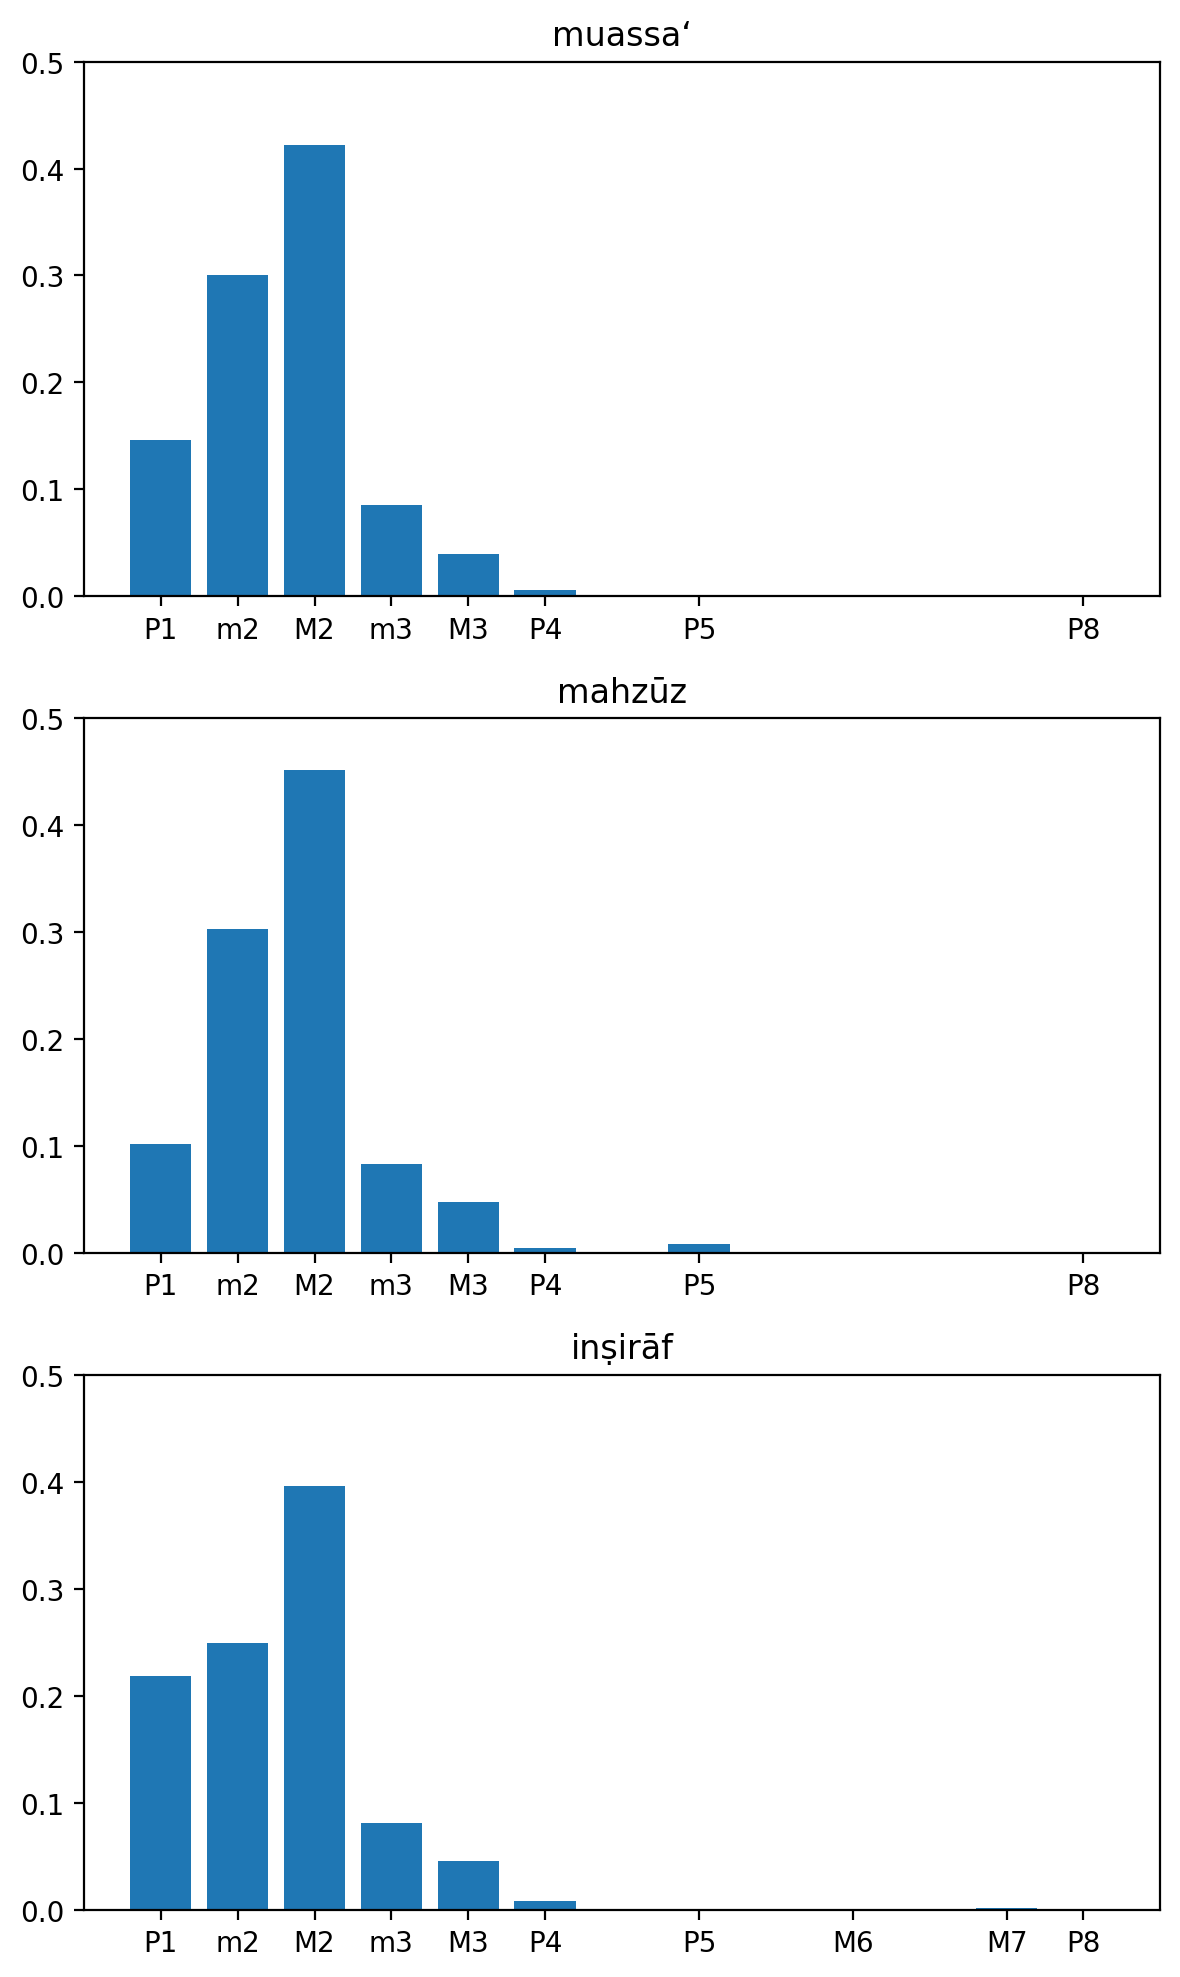

In [9]:
plt.figure(figsize=(6, 10))

for sectionName in sectionNames:
    sectionDic = intervals[sectionName]
    # Order the intervals
    # Create a dictionary with the equivalence of each interval's size in semitones and its name.
    intervalsOrder = {}
    for k in sectionDic.keys():
        itv = interval.Interval(k)
        intervalsOrder[itv.semitones] = k
    # Ordered list of intervals by semitones size
    xValues = sorted(intervalsOrder.keys())
    # Oredred list of interval names by their semitiones size to be use as ticks for the x axis.
    xTicks = [intervalsOrder[i] for i in xValues]
    # Ordered list of y axis values
    yValues = np.array([sectionDic[i] for i in xTicks])
    # Normalize yValues for better comparison
    yValues = yValues / sum(yValues)
    
    # Create the subplot
    plt.subplot(311 + sectionNames.index(sectionName))
    plt.bar(xValues, yValues)
    plt.xticks(xValues, xTicks)
    # Common x and y axes limits
    plt.xlim(-1, 13)
    plt.ylim(0, 0.5)
    plt.title(sectionName)

plt.tight_layout()
plt.show()